# Test Learning ~~Perceptron~~ Neuron

In [1]:
import sys
import matplotlib.pyplot as plt
import scipy as sp
from random import seed, uniform
sys.path.append("../code")
from sigmoid_neuron import LearningNeuron
from learning_perceptron.utils import (Line, results, plot_result,
confusion_matrix, accuracy, precision, recall, f1_score,
training_set, train, particular_train)

%matplotlib inline

Definir seed:

In [2]:
seed(2)

Definir constantes:

In [3]:
MIN_X = -50.0
MAX_X = 50.0
MIN_Y = -50.0
MAX_Y = 50.0
M_RANGE = (-5.0, 5.0)
N_RANGE = (-1.0, 1.0)
X_RANGE = (MIN_X, MAX_X)
Y_RANGE = (MIN_Y, MAX_Y)
LR = 0.1
N = 1000

Definir linea divisora

In [4]:
line = Line(M_RANGE, N_RANGE, X_RANGE, Y_RANGE)

Show defined line:

In [5]:
first_point, second_point = line.line()

print(
    "Line:\n\tm: {} and n: {}\n\tFirst Point: ({}, {})\n\tSecond Point: ({}, {})".format(
        line.m, line.n, first_point[0], first_point[1], second_point[0], second_point[1]
    )
)

Line:
	m: 4.560342718892494 and n: 0.8956549741186988
	First Point: (-11.160489049050902, -50.0)
	Second Point: (10.767687442097898, 50.0)


Definir neuron

In [6]:
first_neuron = LearningNeuron(LR, "First Neuron")
w1, w2, b = first_neuron.get_weights()
print(
    "Neuron: {}\n\tInitial weight\n\t\tw1: {}\tw2: {}\tb: {}".format(
        first_neuron.name, w1, w2, b
    )
)

Neuron: First Neuron
	Initial weight
		w1: -1.7737945290927652	w2: -1.6605120193643135	b: 1.3419955125177983


## Sin entrenamiento

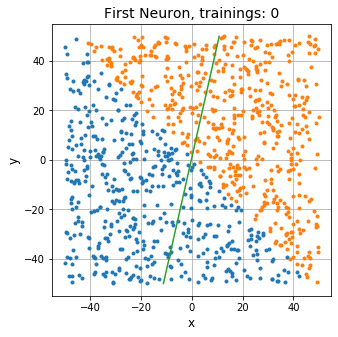

In [7]:
X_1, Y_1, X_2, Y_2 = results(first_neuron, X_RANGE, Y_RANGE, N)
plot_result(X_1, Y_1, X_2, Y_2, first_point, second_point, first_neuron)

In [8]:
FP, TP, FN, TN = confusion_matrix(line, X_1, Y_1, X_2, Y_2)
print("FP: {}, TP: {}, FN: {}, TN: {}".format(FP, TP, FN, TN))
print("Accuracy: {}".format(accuracy(FP, TP, FN, TN)))
print("Precision: {}".format(precision(FP, TP)))
print("Recall: {}".format(recall(TP, FN)))
print("F1-Score: {}".format(f1_score(FP, TP, FN)))

FP: 134, TP: 349, FN: 156, TN: 361
Accuracy: 0.71
Precision: 0.722567287784679
Recall: 0.691089108910891
F1-Score: 0.7064777327935221


## Con dos seciones de entrenamiento

Measures:
	accuracy: 0.744
	precision: 0.7419354838709677
	recall: 0.7651663405088063
	f1-score: 0.7533718689788054


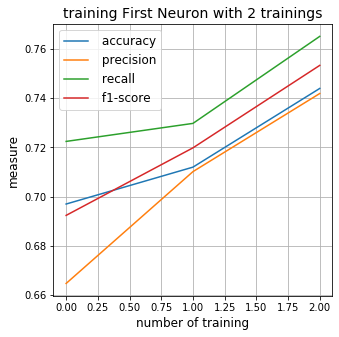

In [9]:
particular_train(first_neuron, 2, N, line)

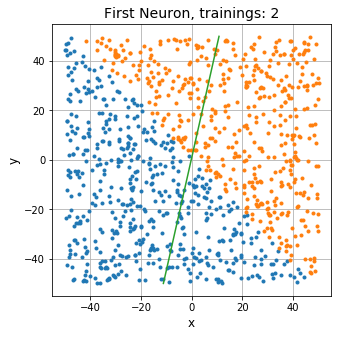

In [10]:
r = results(first_neuron, X_RANGE, Y_RANGE, N)
plot_result(r[0], r[1], r[2], r[3], first_point, second_point, first_neuron)

## Con 20 seciones

Measures:
	accuracy: 0.737
	precision: 0.7403651115618661
	recall: 0.73
	f1-score: 0.7351460221550855


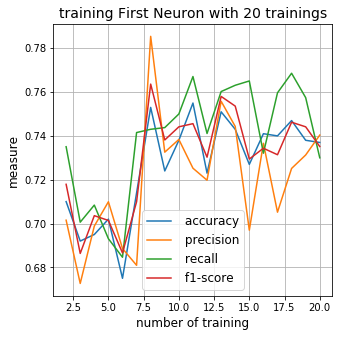

In [11]:
particular_train(first_neuron, 18, N, line)

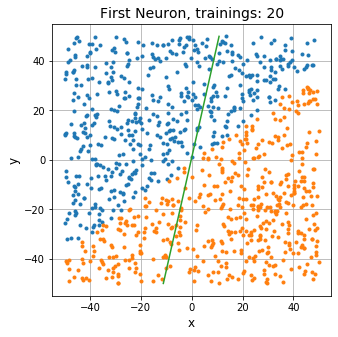

In [12]:
r = results(first_neuron, X_RANGE, Y_RANGE, N)
plot_result(r[0], r[1], r[2], r[3], first_point, second_point, first_neuron)

## Con 50 seciones

Measures:
	accuracy: 0.909
	precision: 0.905511811023622
	recall: 0.9145129224652088
	f1-score: 0.9099901088031652


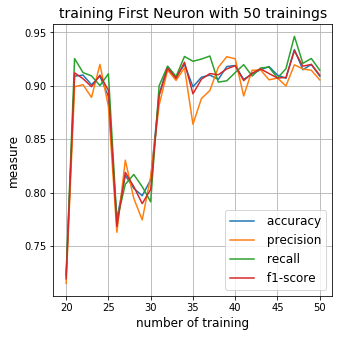

In [13]:
particular_train(first_neuron, 30, N, line)

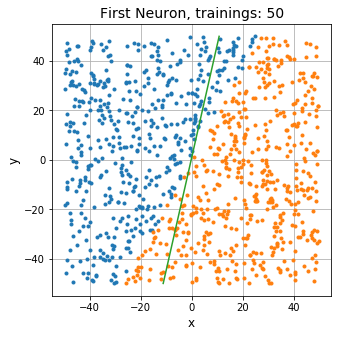

In [14]:
r = results(first_neuron, X_RANGE, Y_RANGE, N)
plot_result(r[0], r[1], r[2], r[3], first_point, second_point, first_neuron)

## Diferentes tasas de aprendizaje

Tazas de aprendizaje

In [15]:
LRs = sp.linspace(0, 1, 11)

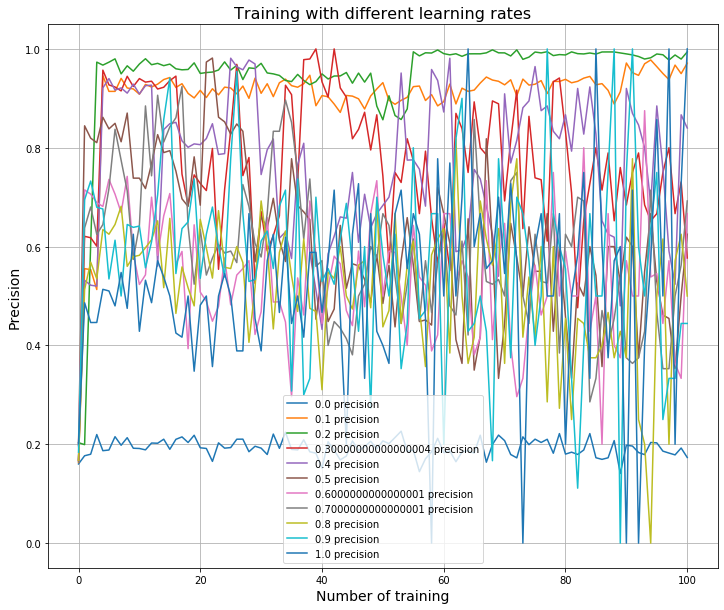

In [16]:
from sigmoid_neuron import SigmoidNeuron

fig, ax = plt.subplots(figsize=(12, 10))

for lr in LRs:
    test_neuron = SigmoidNeuron("test", 1.5, -1.5, 0)
    
    a_neuron = LearningNeuron(lr, "Neuron{}".format(lr))
    a_neuron.perceptron = test_neuron
    
    train(a_neuron, N, 100, line, label=str(lr), ax_pr=ax)
    
ax.set_xlabel("Number of training", fontsize=14)
ax.set_ylabel("Precision", fontsize=14)
ax.set_title("Training with different learning rates", fontsize=16)
ax.legend(fontsize = 10)
    
ax.grid()